In [1]:
import numpy as np
import tensorflow as tf

In [2]:
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input

In [3]:
from tensorflow.keras.preprocessing import image

In [4]:
import os

**Using the resnet_50 model not including fully connected layers**

In [5]:
embed_model = ResNet50(include_top=False,pooling='max')

In [6]:
root_dir = '101_ObjectCategories/'

**Let's define a function for getting paths of images in out data set**

In [7]:
def extract_files(root_dir):
    file_names = []
    for root,dir,files in os.walk(root_dir):
        for file in files:
            path = root+'/'+file
            file_names.append(path)
    return file_names

**Calling extract_files function to get the full path of the image files in the 101_ObjectCategories**

In [8]:
file_names = extract_files(root_dir=root_dir)

In [9]:
len(file_names)

9145

In [10]:
file_names[0]

'101_ObjectCategories/accordion/image_0001.jpg'

**Let's see how to load image and then convert loaded instance into array pixels based on the path**

In [11]:
from tensorflow.keras.preprocessing import image

In [12]:
instance = image.load_img('101_ObjectCategories/accordion/image_0001.jpg')

In [13]:
img_array = image.img_to_array(instance)

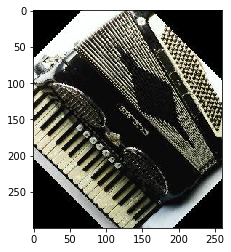

In [14]:
import matplotlib.pyplot as plt
plt.imshow(instance)

In [15]:
print('The shape of input is :',embed_model.input_shape)

The shape of input is : (None, None, None, 3)


**We have 4 fields 'None, None, None, 3'**
* **First field represnts the batch_size, and none represents it can take any possible batch_size**
* **2nd and 3rd fields represents the image dimensions per_channel ( width and height)**
* **4th field represents no.of channels for any color image we have 3 channels (rbg), and for grey_scale images no.of channels is 1** 

# --------------------------------------------------------------------------------------------------

# Definig a function to extract feature_vectors:
* **Each element in the feature vector is a 32-bit float**

In [16]:
def image_embedding(file_path):
    instance = image.load_img(file_path,target_size=(224,224))
    img_array = image.img_to_array(instance)
    batch = np.expand_dims(img_array,axis=0)
    input_batch = preprocess_input(batch)
    features = embed_model.predict(input_batch)
    features = features.flatten()
    unit_vector_embedding = features/np.linalg.norm(features)
    return unit_vector_embedding

In [19]:
print('**************************** test: ******************************')
test_vec = image_embedding(file_names[0])
print('Length of the vector : ',len(test_vec))

**************************** test: ******************************
Length of the vector :  2048


# -------------------------------------------------------------------------------------------------------

* **Every feature vector has 2048 elements***
* **Each element is 32-bit in size**
* **2048*32 = 65536 => each vector is of size 66 kb!** 

In [24]:
feature_vecs = []
for file in file_names:
    feature_vecs.append(image_embedding(file))

In [25]:
import pickle

**Let's write the feature vectors and the file paths to pickle files so that we can re use them without having to calculate again!**

In [26]:
pickle.dump(feature_vecscopenopen('Embeddings/caltech101_embeddings.pickle','wb'))
pickle.dump(file_names,opEmbeddings/'Embeddings/caltech101_file_paths.pickle','wb'))